### **ЛАБОРАТОРНАЯ РАБОТА ПО МАТЕМАТИЧЕСКОЙ СТАТИСТИКЕ №1: ОПИСАТЕЛЬНАЯ СТАТИСТИКА**
#### Условие задачи
Для 5 распределений:
* Нормальное распределение $N(x, 0, 1)$
* Распределение Коши $C(x, 0, 1)$
* Распределение Стьюдента $t(x, 0, 3)$ с тремя степенями свободы
* Распределение Пуассона $P(k, 10)$
* Равномерное распределение $U(x, -\sqrt3, \sqrt3)$

Сгенерировать выборки размером 10, 50 и 1000 элементов.
Построить на одном рисунке гистограмму и график плотности распределения.


#### Предисловие
Необходимые импорты:

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


#### Нормальное распределение

Код и графики:

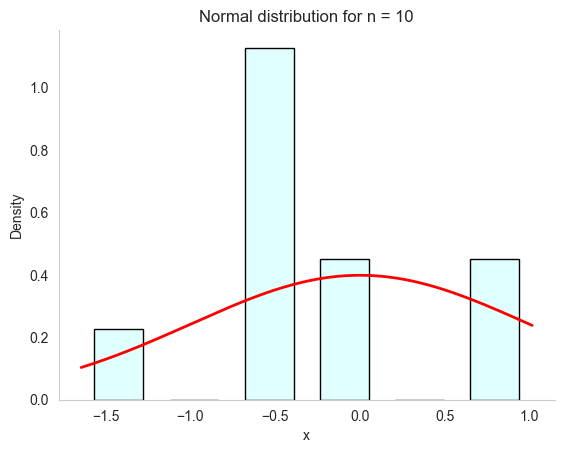

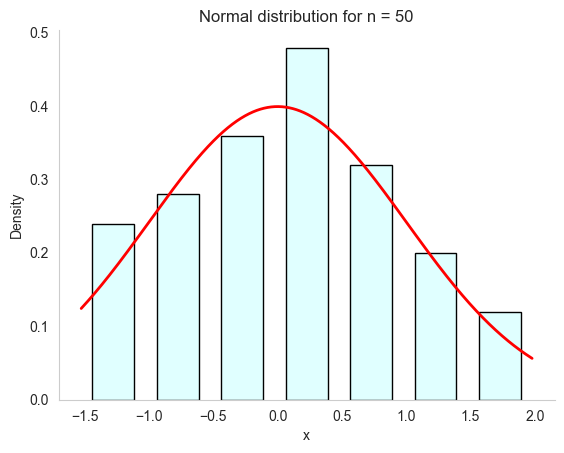

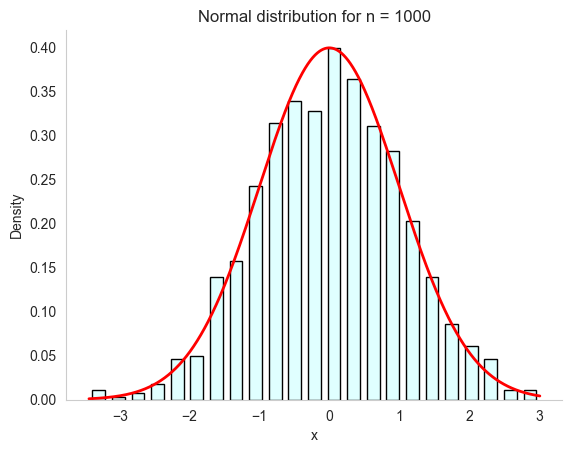

In [160]:
sample_size_list = [10, 50, 1000]
for sample_size in sample_size_list:
    fig, ax = plt.subplots(1, 1)
    X = stats.norm.rvs(size=sample_size, loc=0, scale=1)
    x = np.linspace(start=X.min(), stop=X.max(), num=1000)
    
    ax.plot(x, stats.norm.pdf(x), color='red', linewidth=2)
    ax.hist(X, density=True, bins='auto', edgecolor='black', color='lightcyan', linewidth=1, rwidth=0.65)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(f'Normal distribution for n = {sample_size}')
    plt.xlabel('x')
    plt.ylabel('Density')

    plt.savefig(f'norm{sample_size}')
    plt.show()


#### Распределение Коши

Код и графики:

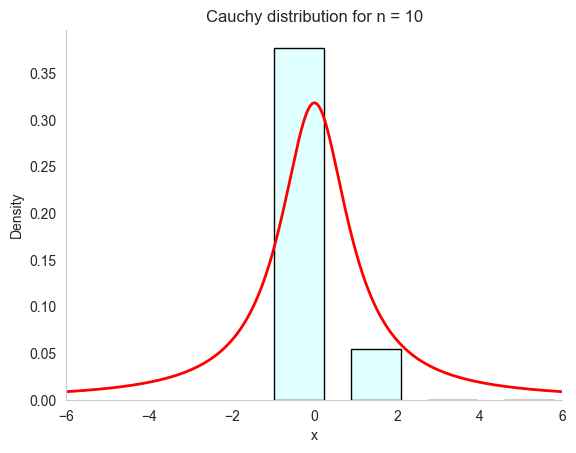

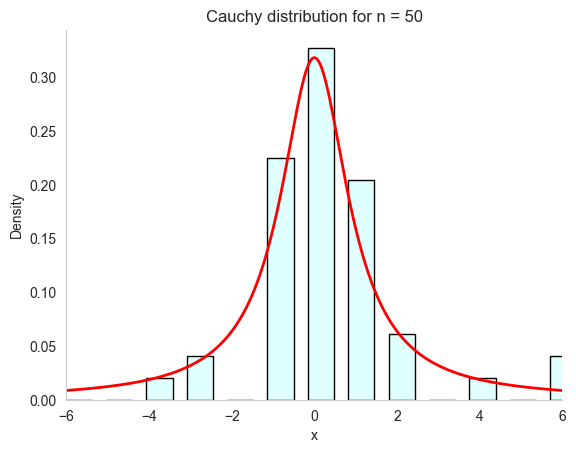

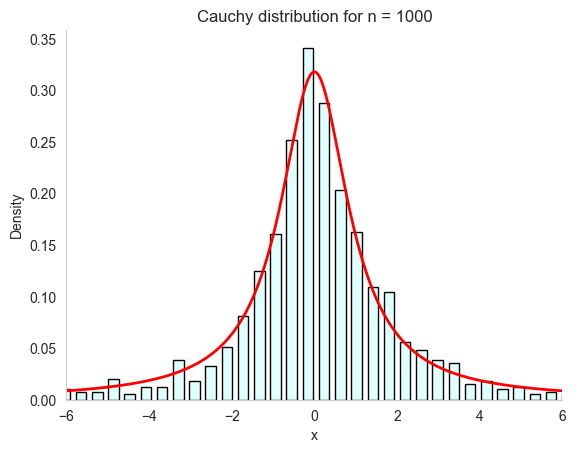

In [161]:
sample_size_list = [10, 50, 1000]
for sample_size in sample_size_list:
    fig, ax = plt.subplots(1, 1)
    X = stats.cauchy.rvs(size=sample_size)
    x = np.linspace(start=-6, stop=6, num=10000)

    ax.plot(x, stats.cauchy.pdf(x), color='red', linewidth=2)
    ax.hist(X, density=True, bins='auto', edgecolor='black', color='lightcyan', linewidth=1, rwidth=0.65)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(f'Cauchy distribution for n = {sample_size}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.xlim(-6, 6)
    

    plt.savefig(f'cauchy{sample_size}')
    plt.show()

#### Распределение Стьюдента

Код и графики:

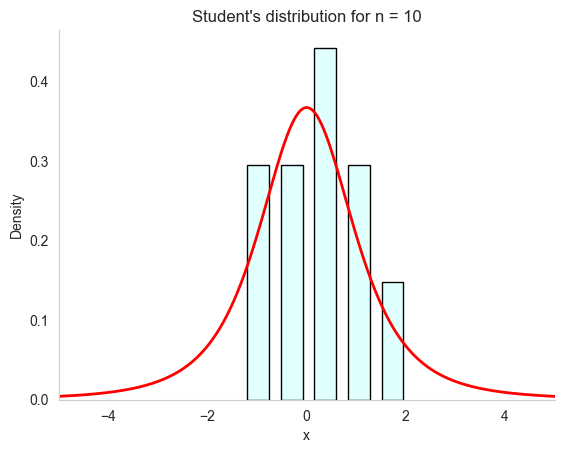

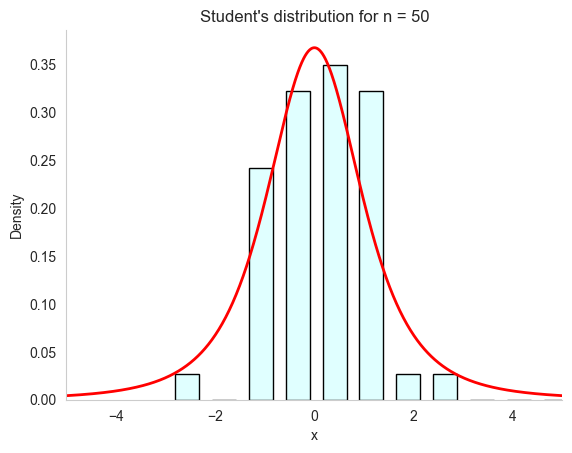

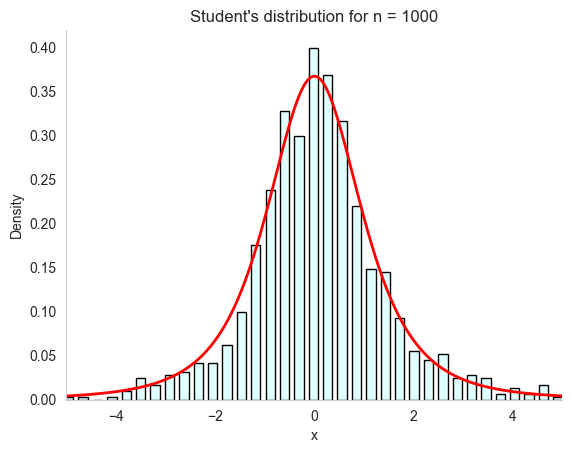

In [162]:
df = 3  # количество степеней свободы
sample_size_list = [10, 50, 1000]
for sample_size in sample_size_list:
    fig, ax = plt.subplots(1, 1)
    X = stats.t.rvs(size=sample_size, df=df)
    x = np.linspace(start=-5, stop=5, num=1000)

    ax.plot(x, stats.t.pdf(x, df=df), color='red', linewidth=2)
    ax.hist(X, density=True, bins='auto', edgecolor='black', linewidth=1, color='lightcyan', rwidth=0.65)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(f"Student's distribution for n = {sample_size}")
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.xlim(-5, 5)

    plt.savefig(f't{sample_size}')
    plt.show()

#### Распределение Пуассона

Код и графики:

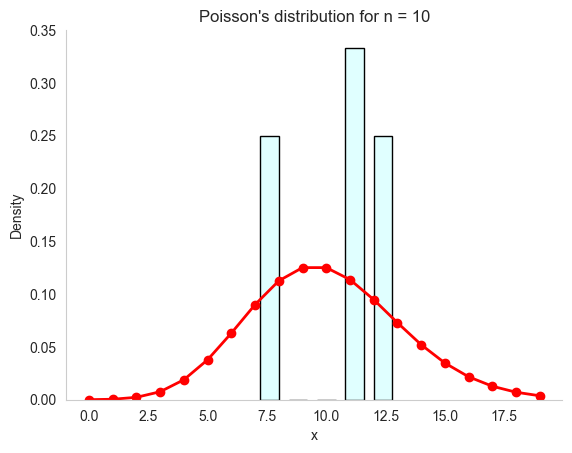

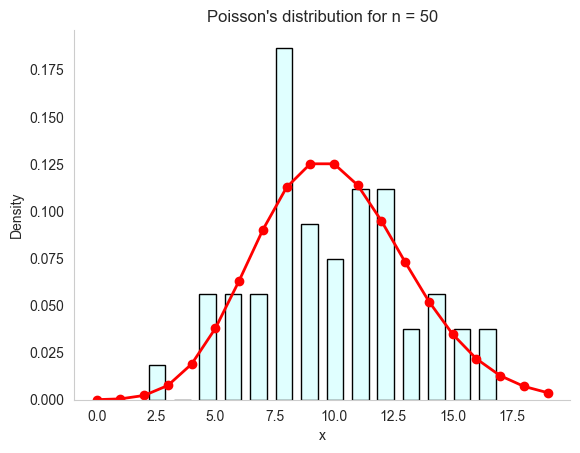

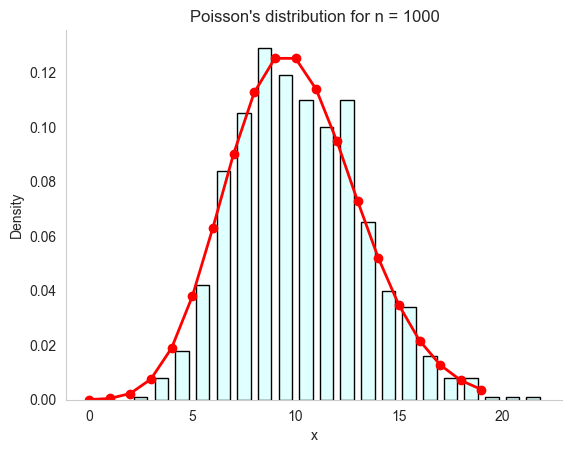

In [163]:
mu = 10  # параметр распределения Пуассона
sample_size_list = [10, 50, 1000]
for sample_size in sample_size_list:
    fig, ax = plt.subplots(1, 1)
    X = stats.poisson.rvs(size=sample_size, mu=mu)
    x = np.arange(start=0, stop=20)
    
    ax.plot(x, stats.poisson.pmf(x, mu=mu), marker='o', color='red', linewidth=2)
    ax.hist(X, density=True, bins=len(np.unique(X)), edgecolor='black', linewidth=1, color='lightcyan', rwidth=0.65)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title(f"Poisson's distribution for n = {sample_size}")
    plt.xlabel('x')
    plt.ylabel('Density')
    
    plt.savefig(f'poisson{sample_size}')
    plt.show()

#### Равномерное распределение

Код и графики:

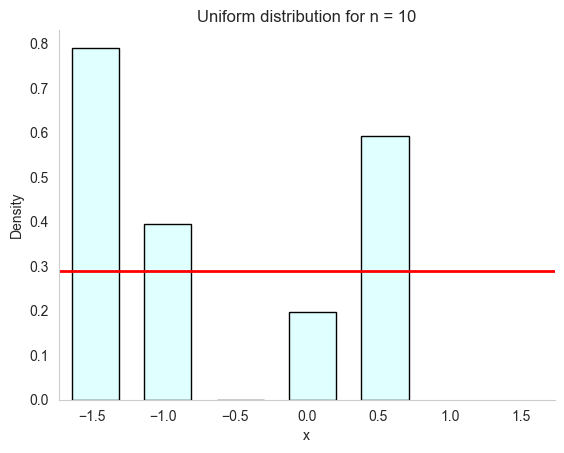

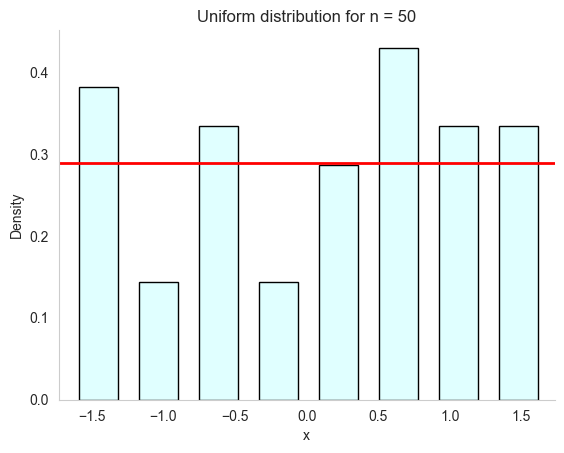

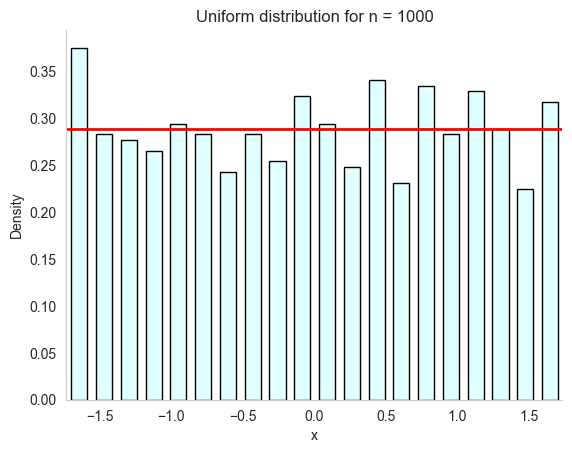

In [170]:
left = -np.sqrt(3)  # левая граница
right = np.sqrt(3)  # правая граница

sample_size_list = [10, 50, 1000]
for sample_size in sample_size_list:
    fig, ax = plt.subplots(1, 1)
    X = stats.uniform.rvs(size=sample_size, loc=left, scale= 2 * right)
    x = np.linspace(start=left, stop=right, num=1000)

    ax.plot(x, stats.uniform.pdf(x, loc=left, scale= 2 * right), color='red', linewidth=2)
    ax.hist(X, density=True, bins='rice', edgecolor='black', color='lightcyan', linewidth=1, rwidth=0.65)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.title(f"Uniform distribution for n = {sample_size}")
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.xlim(left, right)

    plt.savefig(f'uniform{sample_size}')
    plt.show()

### **ЛАБОРАТОРНАЯ РАБОТА ПО МАТЕМАТИЧЕСКОЙ СТАТИСТИКЕ №2: ТОЧЕЧНОЕ ОЦЕНИВАНИЕ ХАРАКТЕРИСТИК ПОЛОЖЕНИЯ И РАССЕЯНИЯ**
#### Условие задачи
Сгенерировать выборки размером 10, 100 и 1000 элементов.
Для каждой выборки вычислить следующие статистические характеристики положения данных: 𝑥, 𝑚𝑒𝑑 𝑥, 𝑧 𝑅, 𝑧𝑄, 𝑧𝑡𝑟.


In [11]:
sample_size = 10
empirical_mean_10_list = []
empirical_median_10_list = []
z_r_10_list = []
z_Q_10_list = []
z_tr_10_list = []

for i in range(1000):
    X = stats.norm.rvs(size=sample_size, loc=0, scale=1)
    X = sorted(X)
    empirical_mean_10 = sum(X) / sample_size
    empirical_median_10 = (X[sample_size // 2 - 1] + X[sample_size // 2]) / 2
    z_r_10 = (X[0] + X[sample_size - 1]) / 2
    z_Q_10 = (X[2] + X[7]) / 2
    z_tr_10 = (1 / (sample_size - 2 * 2)) * (sum(X[3:9]))
    
    empirical_mean_10_list.append(empirical_mean_10)
    empirical_median_10_list.append(empirical_median_10)
    z_r_10_list.append(z_r_10)
    z_Q_10_list.append(z_Q_10)
    z_tr_10_list.append(z_tr_10)
    
E_mean_10 = sum(empirical_mean_10_list) / len(empirical_mean_10_list)
E_median_10 = sum(empirical_median_10_list) / len(empirical_median_10_list)
E_r_10 = sum(z_r_10_list) / len(z_r_10_list)
E_Q_10 = sum(z_Q_10_list) / len(z_Q_10_list)
E_tr_10 = sum(z_tr_10_list) / len(z_tr_10_list)

D_mean_10 = (sum([E * E for E in empirical_mean_10_list]) / len(empirical_mean_10_list)) - E_mean_10 ** 2
D_median_10 = (sum([E * E for E in empirical_median_10_list]) / len(empirical_median_10_list)) - E_median_10 ** 2
D_r_10 = (sum([E * E for E in z_r_10_list]) / len(z_r_10_list)) - E_r_10 ** 2
D_Q_10 = (sum([E * E for E in z_Q_10_list]) / len(z_Q_10_list)) - E_Q_10 ** 2
D_tr_10 = (sum([E * E for E in z_tr_10_list]) / len(z_tr_10_list)) - E_tr_10 ** 2

print("norm 10")
print(E_mean_10, E_median_10, E_r_10, E_Q_10, E_tr_10)
print(D_mean_10, D_median_10, D_r_10, D_Q_10, D_tr_10)



norm 10
-0.004131124386790132 -0.012826225664976312 0.0008191425537177083 -0.0045516283181858954 0.2687611274561088
0.10489383754279788 0.13967964842420116 0.19389802727268876 0.12462936115880963 0.11704622666052583


In [12]:
sample_size = 100
empirical_mean_10_list = []
empirical_median_10_list = []
z_r_10_list = []
z_Q_10_list = []
z_tr_10_list = []

for i in range(1000):
    X = stats.norm.rvs(size=sample_size, loc=0, scale=1)
    X = sorted(X)
    empirical_mean_10 = sum(X) / sample_size
    empirical_median_10 = (X[sample_size // 2 - 1] + X[sample_size // 2]) / 2
    z_r_10 = (X[0] + X[sample_size - 1]) / 2
    z_Q_10 = (X[24] + X[74]) / 2
    z_tr_10 = (1 / (sample_size - 2 * 25)) * (sum(X[26:76]))

    empirical_mean_10_list.append(empirical_mean_10)
    empirical_median_10_list.append(empirical_median_10)
    z_r_10_list.append(z_r_10)
    z_Q_10_list.append(z_Q_10)
    z_tr_10_list.append(z_tr_10)

E_mean_10 = sum(empirical_mean_10_list) / len(empirical_mean_10_list)
E_median_10 = sum(empirical_median_10_list) / len(empirical_median_10_list)
E_r_10 = sum(z_r_10_list) / len(z_r_10_list)
E_Q_10 = sum(z_Q_10_list) / len(z_Q_10_list)
E_tr_10 = sum(z_tr_10_list) / len(z_tr_10_list)

D_mean_10 = (sum([E * E for E in empirical_mean_10_list]) / len(empirical_mean_10_list)) - E_mean_10 ** 2
D_median_10 = (sum([E * E for E in empirical_median_10_list]) / len(empirical_median_10_list)) - E_median_10 ** 2
D_r_10 = (sum([E * E for E in z_r_10_list]) / len(z_r_10_list)) - E_r_10 ** 2
D_Q_10 = (sum([E * E for E in z_Q_10_list]) / len(z_Q_10_list)) - E_Q_10 ** 2
D_tr_10 = (sum([E * E for E in z_tr_10_list]) / len(z_tr_10_list)) - E_tr_10 ** 2

print("norm 100")
print(E_mean_10, E_median_10, E_r_10, E_Q_10, E_tr_10)
print(D_mean_10, D_median_10, D_r_10, D_Q_10, D_tr_10)

norm 100
0.0031388701124178855 0.0028837554706684716 -0.003277307892257232 -0.013624263811121152 0.030239674481001608
0.01014269971973659 0.015438106975008175 0.09388991083703647 0.01242056741963674 0.011881809475974899


In [13]:
sample_size = 1000
empirical_mean_10_list = []
empirical_median_10_list = []
z_r_10_list = []
z_Q_10_list = []
z_tr_10_list = []

for i in range(1000):
    X = stats.norm.rvs(size=sample_size, loc=0, scale=1)
    X = sorted(X)
    empirical_mean_10 = sum(X) / sample_size
    empirical_median_10 = (X[sample_size // 2 - 1] + X[sample_size // 2]) / 2
    z_r_10 = (X[0] + X[sample_size - 1]) / 2
    z_Q_10 = (X[249] + X[749]) / 2
    z_tr_10 = (1 / (sample_size - 2 * 250)) * (sum(X[251:751]))

    empirical_mean_10_list.append(empirical_mean_10)
    empirical_median_10_list.append(empirical_median_10)
    z_r_10_list.append(z_r_10)
    z_Q_10_list.append(z_Q_10)
    z_tr_10_list.append(z_tr_10)

E_mean_10 = sum(empirical_mean_10_list) / len(empirical_mean_10_list)
E_median_10 = sum(empirical_median_10_list) / len(empirical_median_10_list)
E_r_10 = sum(z_r_10_list) / len(z_r_10_list)
E_Q_10 = sum(z_Q_10_list) / len(z_Q_10_list)
E_tr_10 = sum(z_tr_10_list) / len(z_tr_10_list)

D_mean_10 = (sum([E * E for E in empirical_mean_10_list]) / len(empirical_mean_10_list)) - E_mean_10 ** 2
D_median_10 = (sum([E * E for E in empirical_median_10_list]) / len(empirical_median_10_list)) - E_median_10 ** 2
D_r_10 = (sum([E * E for E in z_r_10_list]) / len(z_r_10_list)) - E_r_10 ** 2
D_Q_10 = (sum([E * E for E in z_Q_10_list]) / len(z_Q_10_list)) - E_Q_10 ** 2
D_tr_10 = (sum([E * E for E in z_tr_10_list]) / len(z_tr_10_list)) - E_tr_10 ** 2

print("norm 1000")
print(E_mean_10, E_median_10, E_r_10, E_Q_10, E_tr_10)
print(D_mean_10, D_median_10, D_r_10, D_Q_10, D_tr_10)

norm 1000
0.0004637492388994262 -0.0010089741103692393 0.0002586832779203503 -0.0004763258723797606 0.0029175151755202336
0.000967444595095895 0.0015058567402554525 0.05847012381822885 0.0012724377078047536 0.0011916936399469422
